Part 1:
Applying statistical method for feature selection - Pearson Correlation Coefficient

In [1]:
#basic import statement
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('H:\Hybrid Metaheuristic Feature Selection\Dataset\IoT ID 20_PreProc.csv', low_memory=False)
#read dataset. Use your own dataset path here

In [3]:
y = df['Label']
X = df.drop(['Label'],axis=1)

In [4]:
X

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Sub_Cat
0,12446,25883,8006,203,76,2,3496,75,1,0,...,0,0,0,0,4558,0,74,74,2,2
1,22760,34617,1186,200,10,1,3664,5297,1,1,...,0,0,0,0,7807,22632,3803,605,0,0
2,12691,25886,9854,200,70,1,2082,141,0,2,...,0,0,0,0,4463,253,70,69,4,8
3,12704,25886,9916,200,70,1,791,151,0,1,...,0,0,0,0,5218,0,150,150,2,4
4,611,25881,8443,317,13,2,1040,153,2,0,...,0,0,0,0,4586,253,76,75,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,10261,233,59,2,3443,277,1,0,...,0,0,0,0,5589,0,276,276,2,5
625779,18760,30623,3574,200,10,1,3637,1648,0,1,...,0,0,0,0,6583,0,1207,1207,0,0
625780,12695,25886,9866,200,70,1,2285,77,1,0,...,0,0,0,0,4591,0,76,76,4,8
625781,12682,25883,8002,203,447,1,2872,240,2,0,...,0,0,0,0,5042,6420,124,114,3,6


In [5]:
y

0         0
1         0
2         0
3         0
4         0
         ..
625778    0
625779    0
625780    0
625781    1
625782    0
Name: Label, Length: 625783, dtype: int64

In [6]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=1)

In [7]:
X_train.shape, y_train.shape ,X_test.shape , y_test.shape

((438048, 62), (438048,), (187735, 62), (187735,))

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
features = scaler.transform(X)

In [9]:
#install the required packages for SMOTE (Synthetic Minority Oversampling TEchnique)
# !pip install -U imbalanced-learn
# !pip install imblearn

In [10]:
#implementing SMOTE for oversampling the 1 values from the Label column 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)
xtrain, ytrain = sm.fit_resample(X_train, y_train.ravel())
xtrain.shape,ytrain.shape

C:\Users\wierd\AppData\Local\Temp\ipykernel_2696\2980261790.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xtrain, ytrain = sm.fit_resample(X_train, y_train.ravel())


((533192, 62), (533192,))

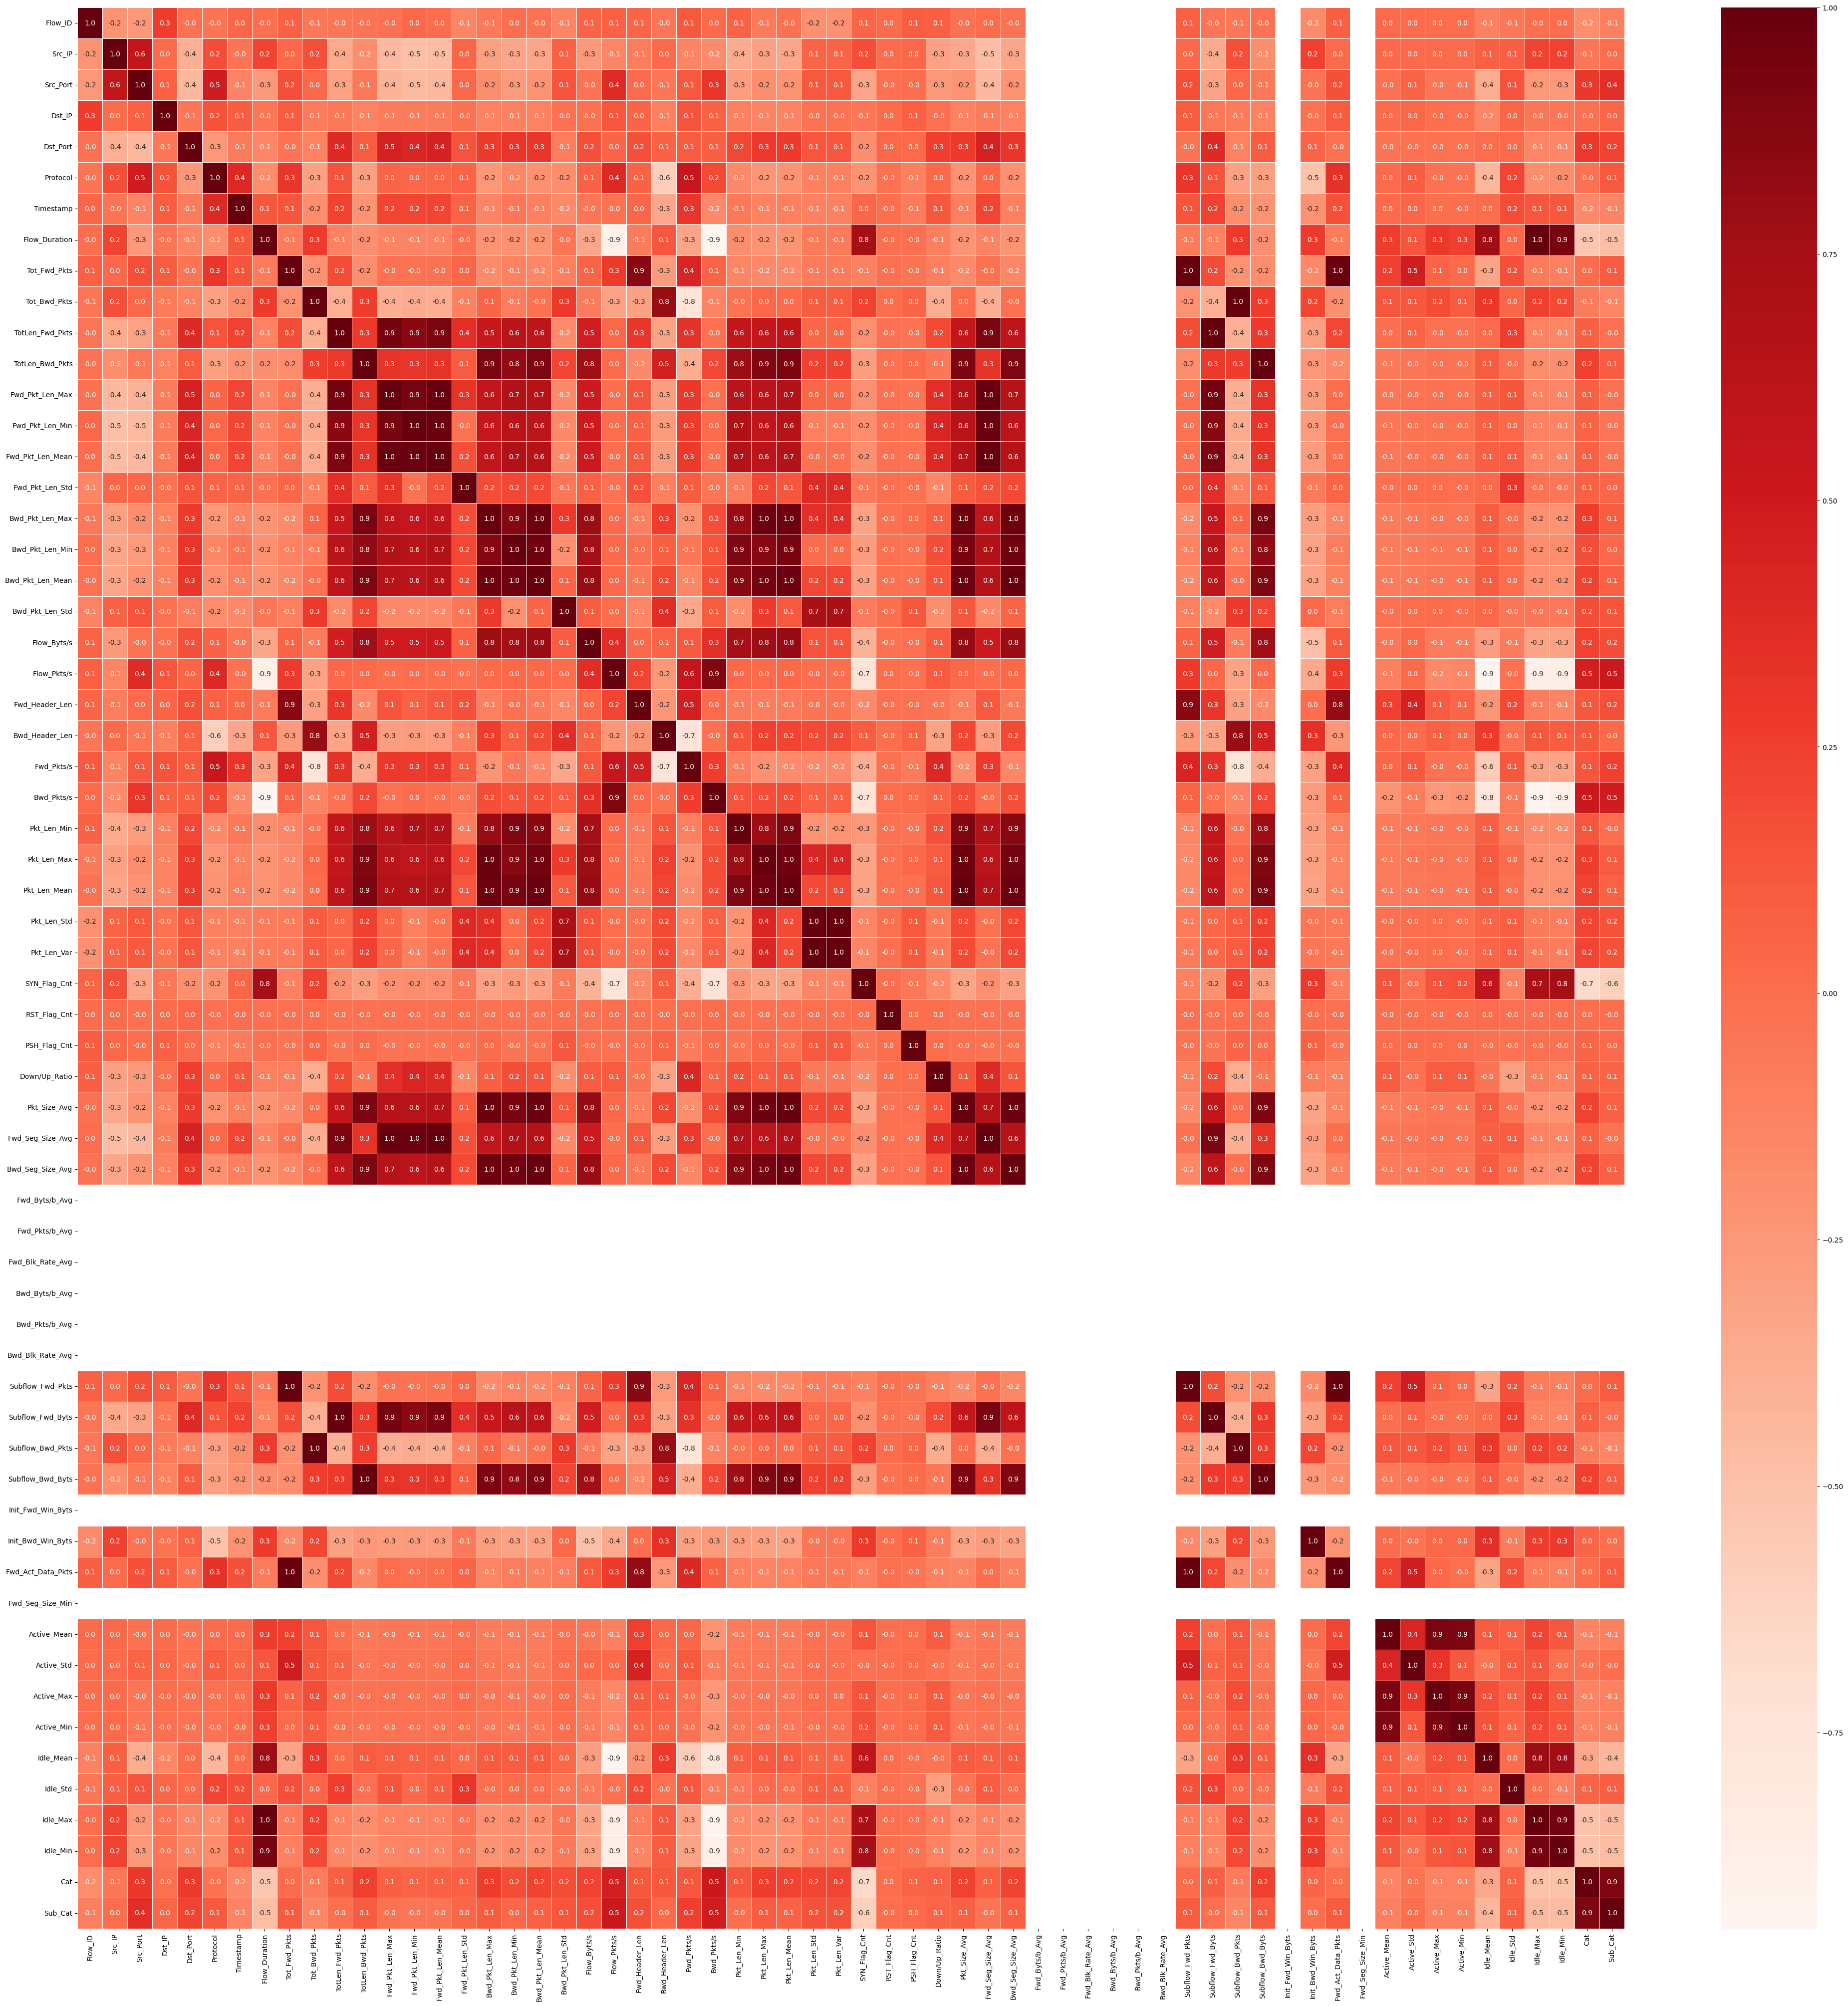

((438048, 33), (187735, 33), (438048,), (187735,))

In [11]:
#implementing the Pearson Correlation Coefficient feature selection

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Calculate correlation matrix
corrmat = X_train_df.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(corrmat,annot=True,linewidth=.5,fmt=".1f",cmap=plt.cm.Reds)
plt.show()

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

corr_features = correlation(pd.DataFrame(X_train),0.75)
len(set(corr_features))

corr_features

X_train_corr=pd.DataFrame(X_train).drop(corr_features,axis=1)
x_test_corr=pd.DataFrame(X_test).drop(corr_features,axis=1)

X_train_corr.shape,x_test_corr.shape,y_train.shape,y_test.shape

In [12]:
X_train_corr.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Std', 'Flow_Pkts/s', 'Fwd_Pkts/s', 'Pkt_Len_Std',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'Down/Up_Ratio', 'Fwd_Byts/b_Avg',
       'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts',
       'Init_Bwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std',
       'Idle_Std', 'Cat'],
      dtype='object')

In [13]:
export_csv = df.drop(corr_features,axis=1)
export_csv

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Std,Label,Cat
0,12446,25883,8006,203,76,2,3496,75,1,0,...,0,0,0,0,0,0,0,0,0,2
1,22760,34617,1186,200,10,1,3664,5297,1,1,...,0,0,0,2341,0,0,0,22632,0,0
2,12691,25886,9854,200,70,1,2082,141,0,2,...,0,0,0,748,0,0,0,253,0,4
3,12704,25886,9916,200,70,1,791,151,0,1,...,0,0,0,748,0,0,0,0,0,2
4,611,25881,8443,317,13,2,1040,153,2,0,...,0,0,0,0,0,0,0,253,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,10261,233,59,2,3443,277,1,0,...,0,0,0,0,0,0,0,0,0,2
625779,18760,30623,3574,200,10,1,3637,1648,0,1,...,0,0,0,2341,0,0,0,0,0,0
625780,12695,25886,9866,200,70,1,2285,77,1,0,...,0,0,0,3276,0,0,0,0,0,4
625781,12682,25883,8002,203,447,1,2872,240,2,0,...,0,0,0,748,0,0,0,6420,1,3


In [14]:
export_csv.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Std', 'Flow_Pkts/s', 'Fwd_Pkts/s', 'Pkt_Len_Std',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'Down/Up_Ratio', 'Fwd_Byts/b_Avg',
       'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts',
       'Init_Bwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std',
       'Idle_Std', 'Label', 'Cat'],
      dtype='object')

In [15]:
export_csv.to_csv('H:/Hybrid Metaheuristic Feature Selection/Dataset/IoT ID 20_StatisticalFS.csv',index=False)